In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns

from pyemma.util.contexts import settings
from glob import glob

## Loading data

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [3]:
indir1 = '../1-Trajectories/2-NoEq_with_IPA'
indir2 = '../1-Trajectories/4-Adaptive_sampling_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list=traj_list1+traj_list2
traj_list

['../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_07.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_08.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_09.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_10.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_07.nc',
 '../1-Traj

## RMSD 'features'

In [16]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile, stride=1)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

Create a Y matrix similar to that optained with PyEMMA after TICA analysis

In [17]:
Y=[]
for i in range(0,len(results_open)):  
    Z=[]
    for j in range(0,len(results_open[i])):
        a=np.array([results_closed[i][j],results_open[i][j]])
        Z.append(a)
    Z=np.array(Z)
    Y.append(Z)
print(len(Y))
print(len(Y[0]))
print(len(Y[0][0]))

49
25000
2


In [18]:
tot=0
for i in range(0,len(Y)):
    tot+=len(Y[i])
print("simulated time:", tot/10000, "microseconds")

simulated time: 83.4825 microseconds


In [4]:
# with open('./pickled/1-With_IPA/1_Y.pickle', 'wb') as outf:
#     pickle.dump(Y, outf)
    
with open('./pickled/1-With_IPA/1_Y.pickle', 'rb') as inf:
    Y = pickle.load(inf)

In [5]:
Y_concat= np.concatenate(Y)

## Density and initial FES

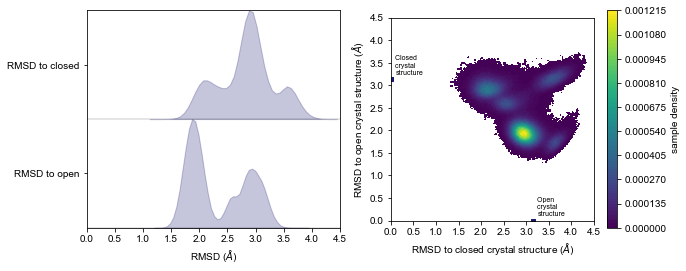

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    Y_concat,
    ax=axes[0],
    feature_labels=[r'RMSD to closed', r'RMSD to open'],
    ylog=False, color="midnightblue")


axes[0].set_xlabel(r'RMSD ($\AA$)')

axes[0].set(xlim=(0,4.5))

axes[0].set_xticks(np.arange(0, 5, 0.5))

pyemma.plots.plot_density(*Y_concat[:, :2].T, ax=axes[1], 
                          logscale=False, nbins=150, alpha=1)

axes[1].scatter(x=0.0, y=3.1458, s=20, c="midnightblue", marker="s")
axes[1].scatter(x=3.1458, y=0.0, s=20, c="midnightblue", marker="s")

axes[1].set_aspect('equal')
axes[1].text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
axes[1].text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')

axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))

axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


# fig.tight_layout()
fig.savefig('./plots/1-With_IPA/1_density.png', dpi=600)

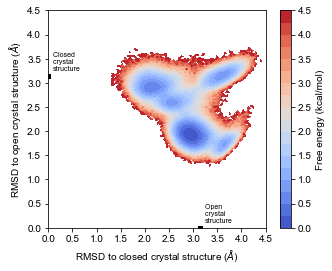

In [9]:
fig, ax = plt.subplots(figsize=(5,4))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, 
                              cax=cax,
                              cbar=True,cmap='coolwarm',ncontours=18,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.savefig('./plots/1-With_IPA/2_initial_FES.png', dpi=600)

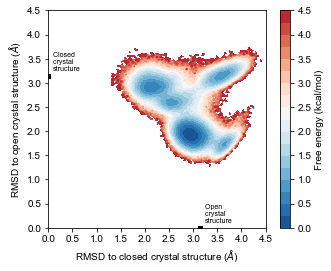

In [10]:
diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[0:18])

fig, ax = plt.subplots(figsize=(5,4))



pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, 
                              cbar=True,cmap=sns_cmap,ncontours=18,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/1-With_IPA/2_initial_FES_cmap2.png', dpi=600)

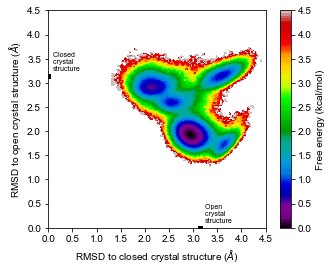

In [7]:
fig, ax = plt.subplots(figsize=(5,4))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, 
                              cax=cax,
                              cbar=True,ncontours=100,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.savefig('./plots/1-With_IPA/2_initial_FES_cmap3.png', dpi=600)

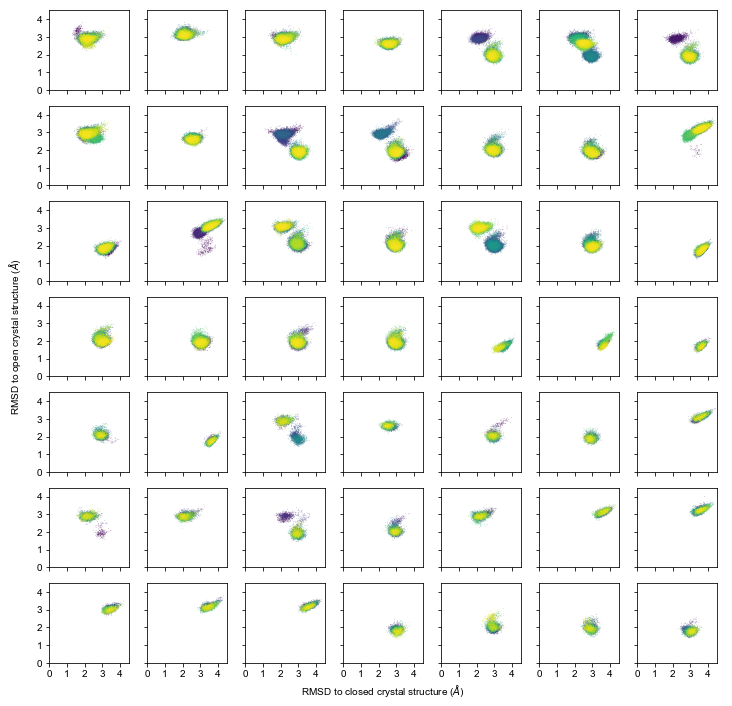

In [16]:
fig, axes = plt.subplots(7, 7, figsize=(12,12), sharex=True, sharey=True)


for i, ax in enumerate(axes.flat):
    ax.scatter(Y[i][:,0], Y[i][:,1],s=0.5, marker='o',edgecolors=None,linewidths=0.0, 
               c=range(0,len(Y[i])), alpha=0.5)
    
    ax.set_xlim(0,4.5)
    ax.set_xticks(np.arange(0, 5, 1))    
    ax.set_ylim(0,4.5)
    ax.set_yticks(np.arange(0, 5, 1))     
    ax.set_aspect('equal')

# To have common x and y labels   
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'RMSD to closed crystal structure ($\AA$)')
plt.ylabel(r'RMSD to open crystal structure ($\AA$)')

fig.savefig('./plots/1-With_IPA/3_sampling_of_individual_trajectories.png', dpi=800)

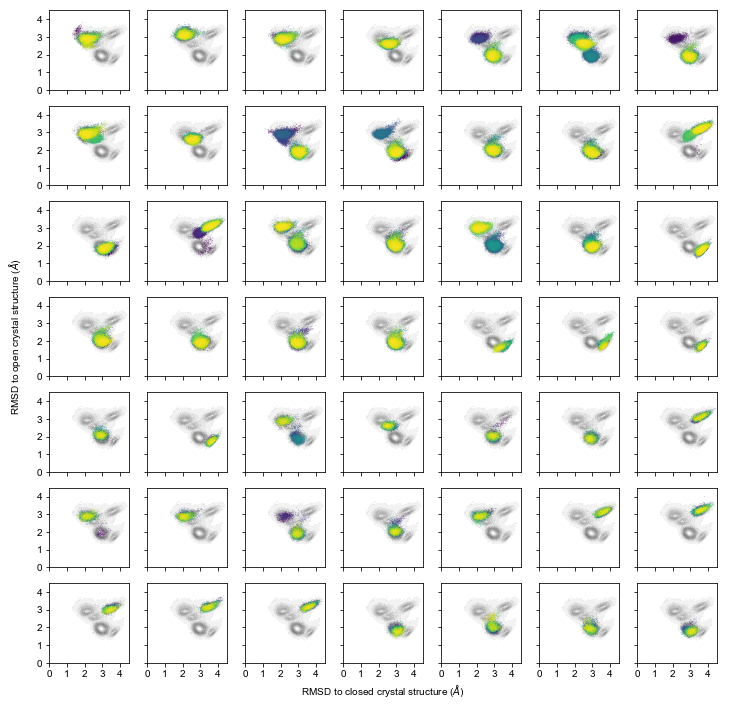

In [15]:
fig, axes = plt.subplots(7, 7, figsize=(12,12), sharex=True, sharey=True)


for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_density(
    *Y_concat[:, :2].T, ax=ax, cbar=False, alpha=0.05, nbins=100, cmap="gray")
    ax.scatter(Y[i][:,0], Y[i][:,1],s=0.5, marker='o',linewidths=0.0,
               c=range(0,len(Y[i])), alpha=0.5)
    ax.set_xlim(0,4.5)
    ax.set_xticks(np.arange(0, 5, 1))    
    ax.set_ylim(0,4.5)
    ax.set_yticks(np.arange(0, 5, 1))     
    ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'RMSD to closed crystal structure ($\AA$)')
plt.ylabel(r'RMSD to open crystal structure ($\AA$)')
    
fig.savefig('./plots/1-With_IPA/3_sampling_of_individual_trajectories_with_overall_FES.png', dpi=800)

## Clustering

In [68]:
n_clustercenters = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1200, 1400, 1600]

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        with pyemma.util.contexts.settings(show_progress_bars=True):
            _cl = pyemma.coordinates.cluster_kmeans(
                Y, k=k, max_iter=500, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

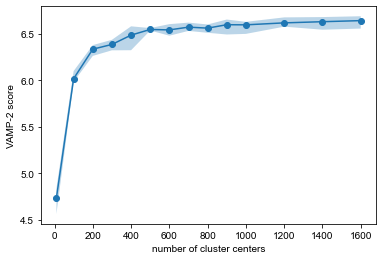

In [69]:
fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
# ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.savefig('./plots/1-With_IPA/4_optimum_cluster_number.png', dpi=600)

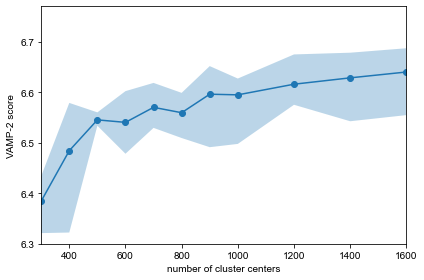

In [70]:
fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
# ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
ax.set_xlim(300, 1600)
ax.set_ylim(6.3, 6.77)
fig.tight_layout()

In [17]:
cluster = pyemma.coordinates.cluster_kmeans(
    Y, k=900, max_iter=500, stride=10)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

In [6]:
# with open('./pickled/1-With_IPA/1_cluster.pickle', 'wb') as outf:
#     pickle.dump(cluster, outf)
    
with open('./pickled/1-With_IPA/1_cluster.pickle', 'rb') as inf:
    cluster = pickle.load(inf)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

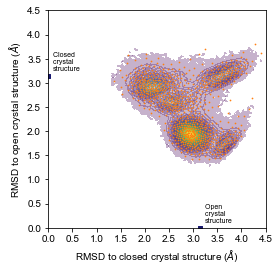

In [19]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *Y_concat[:, :2].T, ax=ax, cbar=False, alpha=0.3, nbins=100)
ax.scatter(*cluster.clustercenters[:, :2].T, s=0.5, c='C1')
ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

ax.scatter(x=0.0, y=3.1458, s=20, c="midnightblue", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="midnightblue", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

fig.savefig('./plots/1-With_IPA/5_clustering.png', dpi=600)

## Lag time

In [10]:
# mylags = [1,2,5,10,25,50,100,250,500,750,1000,1250,1500,1750,2000,2500,3000,4000,5000]

In [191]:
its = pyemma.msm.its(cluster.dtrajs, lags=3000, nits=10, errors='bayes')

KeyboardInterrupt: 

In [28]:
with open('./pickled/1-With_IPA/1_its_5000.pickle', 'wb') as outf:
    pickle.dump(its, outf)
    
# with open('./pickled/1_its_2000.pickle', 'rb') as inf:
#     its = pickle.load(inf)

In [26]:
its

ImpliedTimescales(estimator=MaximumLikelihoodMSM(connectivity='largest', core_set=None,
           count_mode='sliding', dt_traj='1 step', lag=1, maxerr=1e-08,
           maxiter=1000000, milestoning_method='last_core',
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None),
         lags=array([   1,    2,    3,    5,    8,   12,   18,   27,   41,   62,   93,
        140,  210,  315,  473,  710, 1065, 1598, 2397, 3000]),
         n_jobs=4, nits=10, only_timescales=False, show_progress=True)

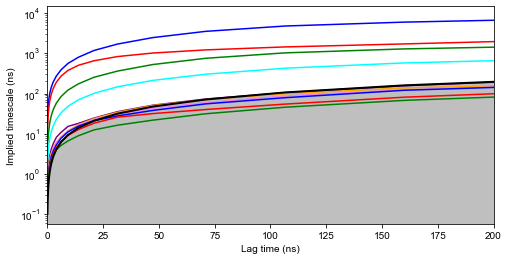

In [190]:
fig, ax = plt.subplots(figsize=(8, 4))

pyemma.plots.plot_implied_timescales(its, ax=ax,units='ns', dt=0.1, ylog=True,);

ax.set_xlim(0,200)
ax.set_xlabel("Lag time (ns)")
ax.set_ylabel("Implied timescale (ns)")


fig.savefig('./plots/1-With_IPA/6_lagtime_1.png', dpi=600)

Text(0, 0.5, 'Implied timescale (ns)')

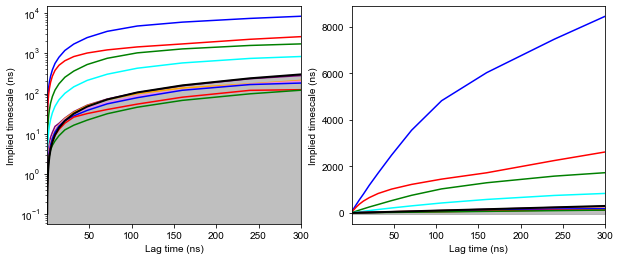

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

pyemma.plots.plot_implied_timescales(its, ax=axes[0],units='ns', dt=0.1, ylog=True,);
pyemma.plots.plot_implied_timescales(its,ax=axes[1], units='ns', dt=0.1, ylog=False);

axes[0].set_xlabel("Lag time (ns)")
axes[0].set_ylabel("Implied timescale (ns)")
axes[1].set_xlabel("Lag time (ns)")
axes[1].set_ylabel("Implied timescale (ns)")

# fig.savefig('./plots/1-With_IPA/6_lagtime_1.png', dpi=600)

[(0.0, 1000.0), (100.0, 110.0)]

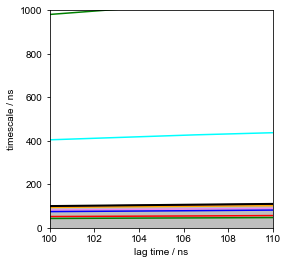

In [35]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1, ylog=False);
ax.set(xlim=(100,110) , ylim=(0, 1000))

In [7]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=1500, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

fraction of states used = 1.00
fraction of counts used = 1.00


In [8]:
with open('./pickled/1-With_IPA/1_msm.pickle', 'wb') as outf:
    pickle.dump(msm, outf)
    
# with open('./pickled/1_msm.pickle', 'rb') as inf:
#     msm = pickle.load(inf)

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/plots/plots2d.py:253: UserWarning: bins=100 is not an allowed optional parameter and will be ignored
  ' be ignored'.format(key, kwargs[key]))


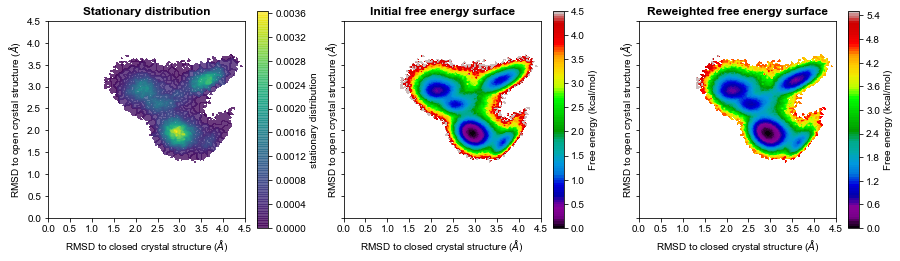

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

pyemma.plots.plot_contour(
    *Y_concat[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0], bins=100,
    mask=True, alpha=0.8,
    cbar_label='stationary distribution')

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T,
    weights=None,
    ax=axes[1], bins=100,
    kT=0.5825, 
    legacy=False,#cmap='coolwarm',ncontours=18,
#     vmin=0.0, vmax=5.0,
    cbar_label="Free energy (kcal/mol)"
)

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[2], bins=100,
    kT=0.5825,legacy=False,#cmap='coolwarm',ncontours=21,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Initial free energy surface', fontweight='bold')
axes[2].set_title('Reweighted free energy surface', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))

axes[2].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[2].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[2].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[2].set_xticks(np.arange(0, 5, 0.5))
axes[2].set_yticks(np.arange(0, 5, 0.5))

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[2].set_aspect('equal')

fig.savefig('./plots/1-With_IPA/7_free_energy_surfaces.png', dpi=600)

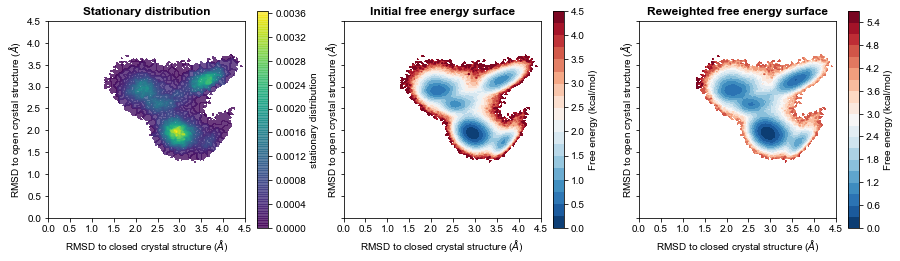

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

pyemma.plots.plot_contour(
    *Y_concat[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0], bins=100,
    mask=True, alpha=0.8,
    cbar_label='stationary distribution')

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T,
    weights=None,
    ax=axes[1], bins=100,
    kT=0.5825, 
    legacy=False,cmap="RdBu_r",ncontours=19,
#     vmin=0.0, vmax=5.0,
    cbar_label="Free energy (kcal/mol)"
)

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[2], bins=100,
    kT=0.5825,legacy=False,cmap="RdBu_r",ncontours=19,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Initial free energy surface', fontweight='bold')
axes[2].set_title('Reweighted free energy surface', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))

axes[2].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[2].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[2].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[2].set_xticks(np.arange(0, 5, 0.5))
axes[2].set_yticks(np.arange(0, 5, 0.5))

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[2].set_aspect('equal')

fig.savefig('./plots/1-With_IPA/7_free_energy_surfaces_cmap2.png', dpi=600)

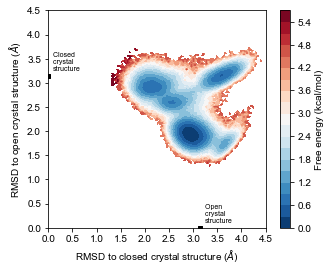

In [11]:
fig, ax = plt.subplots(figsize=(5,4))



pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, weights=np.concatenate(msm.trajectory_weights()),
                              cbar=True,cmap="RdBu_r",ncontours=19,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/1-With_IPA/8_reweighted_FES_cmap2.png', dpi=600)

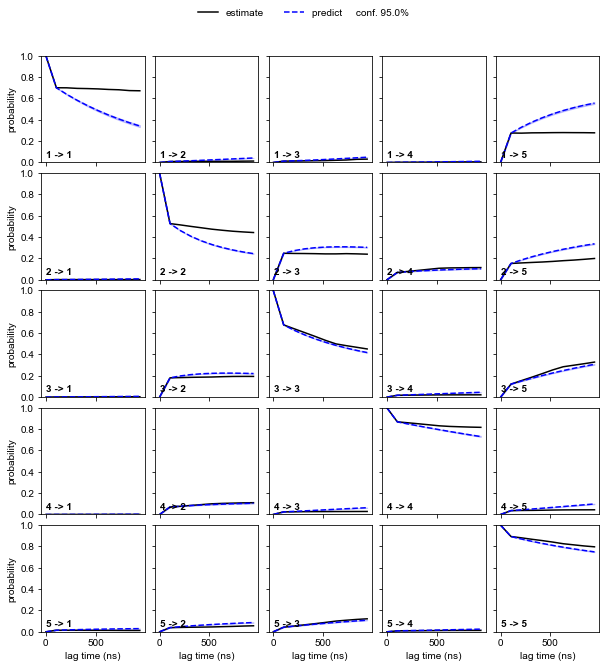

In [45]:
cktest5 = msm.cktest(5)
pyemma.plots.plot_cktest(cktest5, dt=0.1, units='ns');

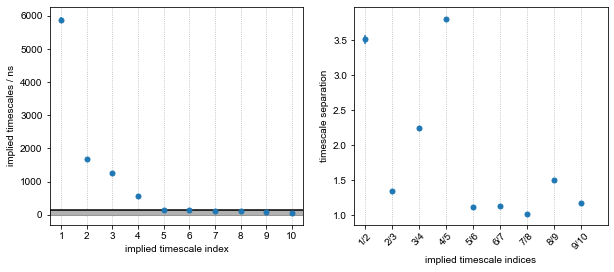

In [12]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

fig.savefig('./plots/1-With_IPA/9_its_separation.png', dpi=600)

The first eigenvector is one: True (min=0.9999999999999876, max=1.0000000000000087)


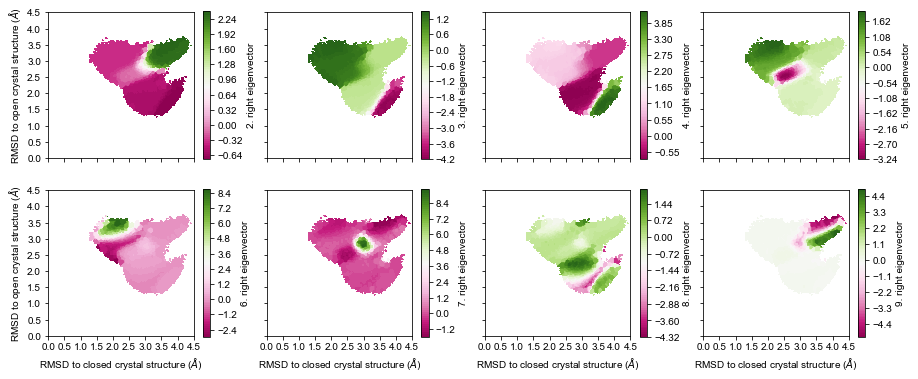

In [13]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(2, 4, figsize=(15, 6), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *Y_concat[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    
    ax.set_xlim(0,4.5)
    ax.set_xticks(np.arange(0, 5, 0.5))
    ax.set_aspect('equal')

axes[1,0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,2].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,3].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0,0].set_ylim(0,4.5)
axes[0,0].set_yticks(np.arange(0, 5, 0.5))
axes[0,0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1,0].set_ylim(0,4.5)
axes[1,0].set_yticks(np.arange(0, 5, 0.5))
axes[1,0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')

# fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/10_eigenvectors.png', dpi=600)

## PCCA metastable states

In [21]:
nstates=5
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

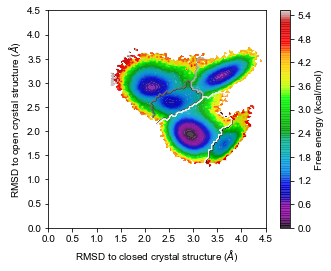

In [15]:
fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=0.8,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.1, nbins=100, cbar=False,cmap="gray")


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.savefig('./plots/1-With_IPA/11_metastable_state_bondaries.png', dpi=600)

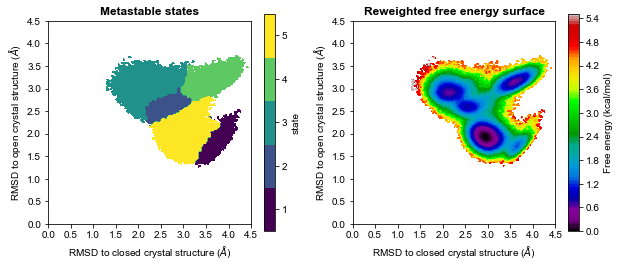

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=False)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=axes[0], zorder=-1, nbins=100)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1], nbins=100,
    kT=0.5825, legacy=False,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

axes[0].set_title('Metastable states', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


axes[0].set_aspect('equal')
axes[1].set_aspect('equal')


# fig.savefig('./plots/12_metastable_states.png', dpi=600)

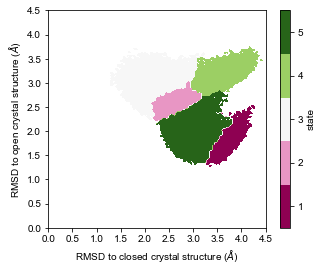

In [42]:
fig, ax = plt.subplots(figsize=(5, 4))

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=ax, 
    cmap='PiYG',
    zorder=-1, nbins=100)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

# fig.savefig('./plots/1-With_IPA/12_metastable_states.png', dpi=600)

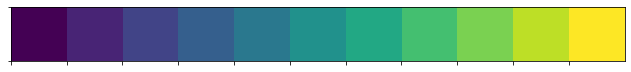

In [51]:
from pylab import *

hexlist=[]

cmap = cm.get_cmap('viridis', 11)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())

In [88]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 1000)

In [90]:
traj_source = pyemma.coordinates.source(traj_list, top=topfile, stride=1)
pyemma.coordinates.save_trajs(
    traj_source,
    pcca_samples,
    outfiles=['./sample_structures/1-With_IPA/1-MSM_1000_samples/pcca{}_samples.xtc'.format(n + 1)
              for n in range(msm.n_metastable)])

['./sample_structures/1-With_IPA/1-MSM_1000_samples/pcca1_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca2_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca3_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca4_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca5_samples.xtc']

### Position metastable samples 

In [91]:
indir_sample = './sample_structures/1-With_IPA/1-MSM_1000_samples'
traj_list_sample = sorted(glob(indir_sample+'/*.xtc'))
traj_list_sample

['./sample_structures/1-With_IPA/1-MSM_1000_samples/pcca1_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca2_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca3_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca4_samples.xtc',
 './sample_structures/1-With_IPA/1-MSM_1000_samples/pcca5_samples.xtc']

In [92]:
results_open_sample=[]
results_closed_sample=[]
for t in traj_list_sample:
    traj=pt.load(t, topfile, stride=1)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_sample.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_sample.append(rmsd_open)

In [95]:
rmsd_open_sample=np.concatenate(results_open_sample, axis=0)
rmsd_closed_sample=np.concatenate(results_closed_sample, axis=0)

In [278]:
results_open_sample

[array([1.66251973, 1.84712175, 1.76548683, ..., 1.84966083, 2.11089998,
        1.86020477])]

In [78]:
def plot_labels(ax=None):
    for i in range(0,len(rmsd_open_sample)):
        plt.text(rmsd_closed_sample[i]+0.02, rmsd_open_sample[i]+0.02, 
                 i, fontsize=12, color='white')

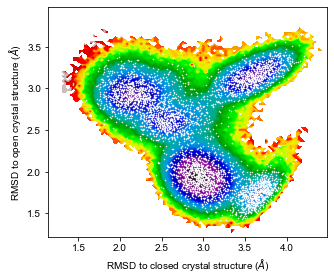

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, 
    cbar=False
)

ax.plot(rmsd_closed_sample, rmsd_open_sample, linewidth=0, marker='o', markersize=0.5, color='white')
# plot_labels(ax=ax)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
# ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')


# ax.scatter(x=0.0, y=3.1458, s=20, c="midnightblue", marker="s")
# ax.scatter(x=3.1458, y=0.0, s=20, c="midnightblue", marker="s")
# ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
# ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

fig.savefig('./plots/1-With_IPA/13_sample_structures.png', dpi=600)

## MFPT

In [97]:
\print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.035730	3.331778
2	0.097973	2.323066
3	0.193927	1.640275
4	0.149449	1.900800
5	0.522922	0.648323


In [99]:
msm.metastable_sets

[array([ 14,  19,  27, ..., 861, 874, 884]),
 array([  1,  12,  24, ..., 869, 873, 882]),
 array([  5,   7,  16, ..., 885, 891, 892]),
 array([  2,   8,  13, ..., 890, 897, 898]),
 array([  0,   3,   4, ..., 895, 896, 899])]

In [185]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / μs:')
DataFrame(np.round(mfpt/1000, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / μs:


,1,2,3,4,5
1,0.00,6.83,6.91,26.87,1.01
2,31.14,0.00,3.21,22.17,2.73
3,31.10,3.44,0.00,24.40,2.72
4,35.44,5.74,8.55,0.00,7.10
5,28.20,5.63,5.68,25.73,0.00


Already in ns because msm was created with option `dt_traj='0.1 ns'`

In [157]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [158]:
stat_dist=[]
for i, s in enumerate(msm.metastable_sets):
    stat_dist.append(msm.pi[s].sum())
print(np.array(stat_dist))

[0.03572952 0.09797273 0.19392673 0.14944897 0.52292205]


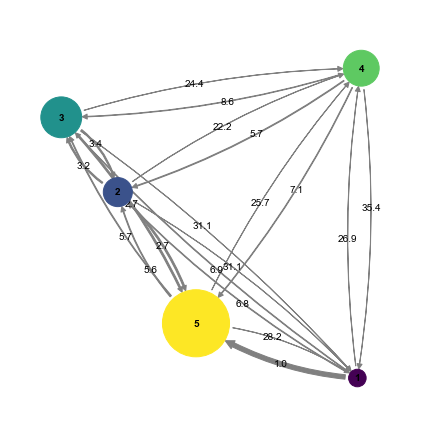

In [188]:
fig, ax = plt.subplots(figsize=(6, 6))

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f',
    arrow_labels=mfpt/1000,
    size=10,
    state_colors=['#440154','#3b528b','#21918c','#5ec962','#fde725'],
    state_labels=['1','2','3','4','5'],
    state_sizes=np.array(stat_dist),
    arrow_scale=1.0, arrow_curvature=1.0,
    show_frame=False,
    arrow_label_size=10,
    fontweight='bold',
    ax=ax)

# ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
# ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(2,4) , ylim=(1.5,3.5))
# ax.set_xticks(np.arange(2, 4.5, 0.5))
# ax.set_yticks(np.arange(1.5, 4, 0.5))
ax.set_aspect('equal')

fig.tight_layout()

In [136]:
fig, ax = plt.subplots(figsize=(6, 5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=ax, cax=cax, zorder=-1, nbins=100, alpha=1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f μs',
    arrow_labels=mfpt/1000,
    size=10,
    state_colors=['#440154','#3b528b','#21918c','#5ec962','#fde725'],
    state_labels=['1','2','3','4','5'],
    show_frame=True,
    ax=ax)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(1,4.5) , ylim=(1,4))
ax.set_xticks(np.arange(1, 5, 0.5))
ax.set_yticks(np.arange(1, 4.5, 0.5))
ax.set_aspect('equal')

fig.tight_layout()

NameError: name 'cm' is not defined

## Tentative HMM

In [53]:
hmm = pyemma.msm.estimate_hidden_markov_model(cluster.dtrajs, nstates, msm.lag)

In [28]:
its2 = pyemma.msm.timescales_hmsm(cluster.dtrajs, 5, lags=1000, nsamples=50, errors=None)

KeyboardInterrupt: 

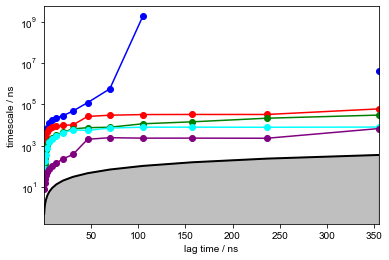

In [87]:

pyemma.plots.plot_implied_timescales(its2, marker='o', ylog=True, units='ns', dt=0.5);


In [ ]:
pyemma.msm.timescales_hmsm(
        cluster.dtrajs, 20, lags=450, errors=None, nsamples=50)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
pyemma.plots.plot_implied_timescales(,
    ax=ax, units='ns', dt=0.1, ylog=True)